In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import math as m
import numpy as np
import pandas as pd
import pandas_datareader.data as data
from scipy.stats import norm
import yfinance as yf
from datetime import date

In [21]:
def stockBinomial(u, d, S0, n):
    stockT = [np.array([S0])] 
    #最后return的是n periods后 最后一列的stock prices
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*d]))
        stockT.append(stockt)            
    return stockT[-1]

def EuropeanCallOption(u, d, p, r, S0, T, K, n):
    dt = T/n
    #a list of stock prices
    S_binomial = stockBinomial(u, d, S0, n) # build stock tree and payoff tree
    #a list with their payoffs
    payoffs = np.maximum(S_binomial - K, 0)    # initialize payoffs
    #for i in range(n):    # find the call option value  
        #payoffs = (payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt))
    return payoffs

r = 0.05
sd = 0.24
S0 = 32
K = 30
T = 0.5
n = [10, 20]

a_parameters = [get_parameters_a(r, sd, n, T) for n in n]
a_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in a_parameters]
a_parameters

[(1.0552978551976473, 0.9475997653882366, 0.5097895637213158, 10),
 (1.0387343543695686, 0.9627100478513804, 0.5069527824633518, 20)]

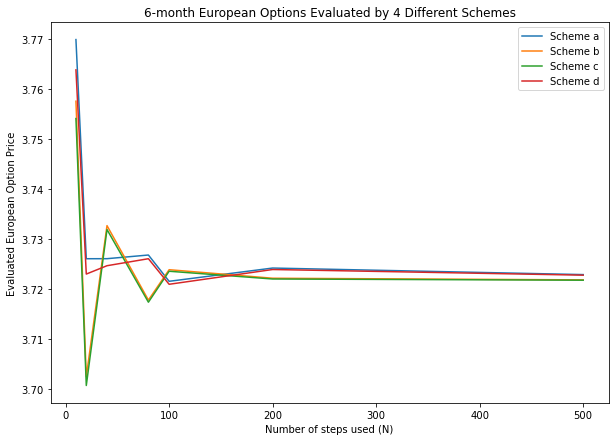

In [2]:
#Question 1
r = 0.05
sd = 0.24
S0 = 32
K = 30
T = 0.5
n = [10, 20, 40, 80, 100, 200, 500]

def stockBinomial(u, d, S0, n):
    stockT = [np.array([S0])] 
    #最后return的是n periods后 最后一列的stock prices
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*d]))
        stockT.append(stockt)            
    return stockT[-1]

def EuropeanCallOption(u, d, p, r, S0, T, K, n):
    dt = T/n
    #a list of stock prices
    S_binomial = stockBinomial(u, d, S0, n) # build stock tree and payoff tree
    #a list with their payoffs
    payoffs = np.maximum(S_binomial - K, 0)    # initialize payoffs
    for i in range(n):    # find the call option value  
        payoffs = (payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt))
    return payoffs[0]

def get_parameters_a(r, sd, n, T):    
    dt = T/n
    c = (1/2)*(m.exp(-r*dt) + m.exp((r + sd**2)*dt))
    d = c - m.sqrt(c**2 - 1)
    u = 1/d    
    p = (m.exp(r*dt) - d)/(u - d)    
    return u, d, p, n

def get_parameters_b(r, sd, n, T):    
    dt = T/n    
    u = m.exp(r*dt)*(1 + m.sqrt(m.exp(sd**2 * dt) - 1))
    d = m.exp(r*dt)*(1 - m.sqrt(m.exp(sd**2 * dt) - 1))    
    p = 1/2    
    return u, d, p, n

def get_parameters_c(r, sd, n, T):    
    dt = T/n    
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))    
    p = 1/2    
    return u, d, p, n

def get_parameters_d(r, sd, n, T):
    dt = T/n    
    u = m.exp(sd*m.sqrt(dt))
    d = m.exp(- sd*m.sqrt(dt))    
    p = 1/2 + (1/2)*((r - 0.5*sd**2)*m.sqrt(dt) / sd)    
    return u, d, p, n

def question1():
    a_parameters = [get_parameters_a(r, sd, n, T) for n in n]
    a_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in a_parameters]
    b_parameters = [get_parameters_b(r, sd, n, T) for n in n]
    b_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in b_parameters]
    c_parameters = [get_parameters_c(r, sd, n, T) for n in n]
    c_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in c_parameters]
    d_parameters = [get_parameters_d(r, sd, n, T) for n in n]
    d_call_values = [EuropeanCallOption(i[0], i[1], i[2], r, S0, T, K, i[3]) for i in d_parameters]
    a = zip(n, a_call_values)
    b = zip(n, b_call_values)
    c = zip(n, c_call_values)
    d = zip(n, d_call_values)
    plt.figure(figsize=(10,7))
    plt.plot(*zip(*a), label="Scheme a")
    plt.plot(*zip(*b), label = "Scheme b")
    plt.plot(*zip(*c), label = "Scheme c")
    plt.plot(*zip(*d), label = "Scheme d")
    plt.title("6-month European Options Evaluated by 4 Different Schemes")
    plt.xlabel("Number of steps used (N)")
    plt.ylabel("Evaluated European Option Price")
    plt.legend()
    plt.show()
question1()

In [3]:
## nb 方法
def nodes_count_total(n):
    'total number of nodes in binomial tree of n nodes'
    return int((n+1)*(n+2)/2)

# compute binomial tree stock price at each node
def binomial_Tree_Values(S0,u,d,p,n,K,delta,r,Euro=1,call=1):
    stock_prices = np.zeros(nodes_count_total(n)) # to hold stock prices
    option_vals = np.zeros(nodes_count_total(n)) # to hold option values/prices
    
    num_nodes = n+1 # number of nodes per step n
    count = 0 # will reset for each step of nodes
    
    # iterate backwards from last node to first
    for i in range(len(stock_prices)-1,-1,-1): 
        
        # cycle through each timestep
        # count increases by 1 every node calculated. When the iterator reaches the final node of a timestep, count resets.
        if count == num_nodes:
            count = 0
            num_nodes -= 1

        # == PAYOFFS ==
        # if we are at the terminal timestep, calculate payoffs
        if num_nodes == n+1:
            stock_prices[i] = S0 * (u**count) * (d**(num_nodes-1-count))
            
            # if it's a call vs put, adjust payoff
            if call:
                option_vals[i] = np.maximum(0,stock_prices[i]-K) # call's payoff at time T
            else:
                option_vals[i] = np.maximum(0,K-stock_prices[i]) # put's payoff at time T
        
        # == REST OF NODES == 
        # if we are NOT at the terminal timestep, calculate discounted call values
        else:
            stock_prices[i] = S0 * (u**count) * (d**(num_nodes-1-count))
            c_u = option_vals[i+num_nodes]
            c_d = option_vals[i+num_nodes+1]
            disc_value = np.exp(-r*delta) * (p*c_u + (1-p)*c_d)
            
            # if it's an American option, compare exercise price
            if not Euro:
                if call:
                    exercise_value = np.maximum(0,stock_prices[i]-K) # call's exercise value at time t
                else:
                    exercise_value = np.maximum(0,K-stock_prices[i]) # put's exercise value at time t
                
                # option's value at this node is the maximum of its exercise value at that node or its discounted value
                option_vals[i] = np.maximum(disc_value,exercise_value)
            
            # if it's a European option, its node value is simply its discounted value
            else:
                option_vals[i] = disc_value

        count += 1
    
    return pd.DataFrame({'Stock_Prices':stock_prices, 'Call_Values': option_vals})

def get_binomial_option_price(S0,u,d,p,n,K,delta,r,Euro=1,call=1):
    return binomial_Tree_Values(S0,u,d,p,n,K,delta,r,Euro,call).iloc[0,1]

In [23]:
#Question 2
r=0.01
n = 500
maturity = pd.to_datetime('2023-01-20') # maturity of call on YF
today = pd.to_datetime(date.today()) # today's date
diff = (maturity - today).days # difference in days between today and maturity
T = diff/365
delta = T/n

# pull 60mo of Amazon stock prices
amzn = yf.Ticker("AMZN")
amzn_prices = amzn.history(period='5y')
current_price = (amzn_prices.iloc[-1][1] + amzn_prices.iloc[-1][2])/2 # take avg of high and low

# vol estimated using 5y historical returns data, Closing price
sigma = amzn_prices.Close.pct_change().std() * np.sqrt(252)

# Strike price is 110% of current stock price, evenly divisible by 50 (rounded up)
K = np.round(1.1*current_price/50) * 50

print("Current AMZN price: ", round(current_price,2))
print("Strike price: ", int(K))
print("AMZN 5y vol: ", round(sigma,4))

Current AMZN price:  122.36
Strike price:  150
AMZN 5y vol:  0.3302


In [24]:

# estimate binomial price of AMZN american call option

#crr model for u d and p
d = np.exp(-sigma*np.sqrt(delta))
u = np.exp(sigma*np.sqrt(delta))
p = 0.5 + 0.5*(r-0.5*sigma**2)*np.sqrt(delta)/sigma


# generate binomial tree values
AMZN_amer_call_est = binomial_Tree_Values(current_price,u,d,p,n,K,delta,r,Euro=0,call=1)
AMZN_est_call_price = AMZN_amer_call_est.iloc[0,1]

# get option price from yfinance
amzn_options = amzn.option_chain('2023-01-20')
df = amzn_options[0]
df = df[df['strike'] == K]
yfin_call_price = df.iloc[0,3]
yfin_call_price

# price of American call option
print("Binomial amer. call est. price: ", round(AMZN_est_call_price,2))
print("Yahoo Finance call price: ", yfin_call_price)

Binomial amer. call est. price:  4.53
Yahoo Finance call price:  5.9


The yahoo Finance's call price is apparently higher than what binomial tree renders, and it's probably resulted from the volatility smile.

In [6]:
# original difference in price
og_diff = yfin_call_price - AMZN_est_call_price
diff = og_diff

iter = 0.2
while abs(diff) > 0.001:
    sigma += iter
    d = np.exp(-sigma*np.sqrt(delta))
    u = np.exp(sigma*np.sqrt(delta))
    p = 0.5 + 0.5*(r-0.5*sigma**2)*np.sqrt(delta)/sigma
    new_price_est = binomial_Tree_Values(current_price,u,d,p,n,K,delta,r,Euro=0,call=1).iloc[0,1]
    new_diff = yfin_call_price - new_price_est
    
    # if the new price is farther, then change direction of sigma change and halve the step
    if (abs(new_diff) > abs(diff)) | (np.sign(new_diff) != np.sign(diff)):
        iter = -iter/2
        diff = new_diff
    # if the new price is closer, then continue doing what you're doing. Refresh new and old diffs
    else:
        diff = new_diff

print('Implied vol: ', round(sigma,4))

Implied vol:  0.3895


The implied volatility that them equal is 0.3736. The historical vol was 0.315. This higher implied vol is expected since this call is OTM and we expect to see a 'smile' shaped curve with OTM options.

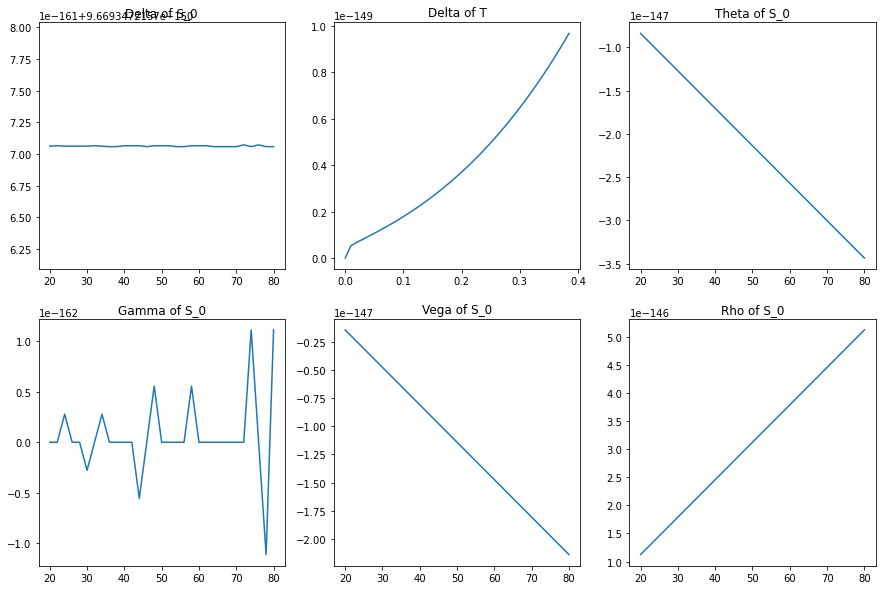

In [7]:
#question3
def Euro_Call(s_0, t, x, r, sig):
    n = 500
    delta = t/n
    c = 0.5*(np.exp(-r*delta)+np.exp((r+sig**2)*delta))
    d = c - np.sqrt(c**2-1)
    u = 1/d
    p = (np.exp(r*delta)-d)/(u-d)
    for i in range(n+1):
        nCi = m.comb(n,i)
        payoff = np.exp(-r*t)*nCi*pow(p,i)*pow(1-p,n-i)*max(s_0*pow(u,i)*pow(d,n-i)-x,0)
    return np.sum(payoff)

def q3_delta(s_0, t, x, r, sig):
    err = 0.5
    delta = (Euro_Call(s_0+err, t, x, r, sig) - Euro_Call(s_0-err, t, x, r, sig))/(2*err)
    return delta

def q3_gamma(s_0, t, x, r, sig):
    err = 0.5
    gamma = (Euro_Call(s_0+err, t, x, r, sig) + Euro_Call(s_0-err, t, x, r, sig) - 2*Euro_Call(s_0, t, x, r, sig))/(err**2)
    return gamma

def q3_theta(s_0, t, x, r, sig):
    err = 0.0001
    theta = - (Euro_Call(s_0, t+err, x, r, sig) - Euro_Call(s_0, t-err, x, r, sig))/(2*err)
    return theta
def q3_vega(s_0, t, x, r, sig):
    err = 0.0001
    vega = (Euro_Call(s_0, t, x, r, sig+err) - Euro_Call(s_0, t, x, r, sig-err))/(2*err)
    return vega
def q3_rho(s_0, t, x, r, sig):
    err = 0.0001
    rho = (Euro_Call(s_0, t, x, r+err, sig) - Euro_Call(s_0, t, x, r-err, sig))/(2*err)
    return rho
def question3():
    init = [20+2*i for i in range(31)]
    greeks = pd.DataFrame(columns=['Delta of S_0', 'Gamma of S_0', 'Theta of S_0', 'Vega of S_0', 'Rho of S_0'], index=init)
    for i in range(31):
        greeks.iloc[i, 0] = q3_delta(init[i], 0.3846, 50, 0.03, 0.2)
        greeks.iloc[i, 1] = q3_gamma(init[i], 0.3846, 50, 0.03, 0.2)
        greeks.iloc[i, 2] = q3_theta(init[i], 0.3846, 50, 0.03, 0.2)
        greeks.iloc[i, 3] = q3_vega(init[i], 0.3846, 50, 0.03, 0.2)
        greeks.iloc[i, 4] = q3_rho(init[i], 0.3846, 50, 0.03, 0.2)
    tau = [0.000001]+[round(0.01 * i, 4) for i in range(1, 39)]+[0.3846]#if tau start with 0, there would be RuntimeWaring saying "RuntimeWarning.To avoid this problem, replace t=0 with t=0.000001
    delta_t = []
    for i in range(40):
        delta_t.append(q3_delta(49, tau[i], 50, 0.03, 0.2))
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.plot(init, greeks.iloc[:, 0])
    plt.title(greeks.columns.values.tolist()[0])
    plt.subplot(2, 3, 2)
    plt.plot(tau, delta_t)
    plt.title('Delta of T')
    plt.subplot(2, 3, 3)
    plt.plot(init, greeks.iloc[:, 2])
    plt.title(greeks.columns.values.tolist()[2])
    plt.subplot(2, 3, 4)
    plt.plot(init, greeks.iloc[:, 1])
    plt.title(greeks.columns.values.tolist()[1])
    plt.subplot(2, 3, 5)
    plt.plot(init, greeks.iloc[:, 3])
    plt.title(greeks.columns.values.tolist()[3])
    plt.subplot(2, 3, 6)
    plt.plot(init, greeks.iloc[:, 4])
    plt.title(greeks.columns.values.tolist()[4])
    plt.show()
question3()

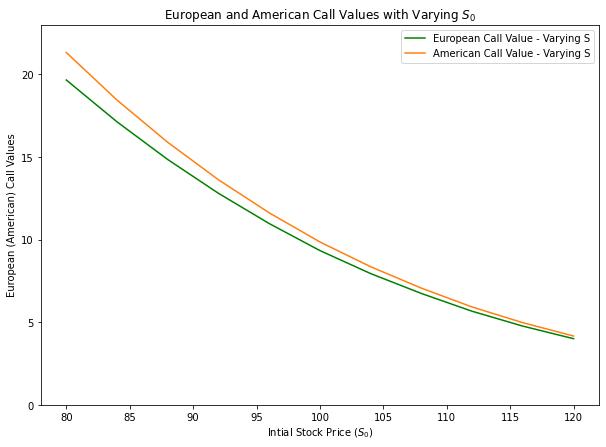

In [8]:
#### question 4
def stockBinomial_am(u, d, S0, n):
    stockT = [np.array([S0])]
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*d]))
        stockT.append(stockt)
    return stockT

def EuropeanPutOption(r, sd, S0, T, K, n):
    dt = T/n    # find u, d and p
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))
    p = (m.exp(r*dt) - d)/ (u - d)
    S_binomial = stockBinomial(u, d, S0, n)# build stock tree and payoff tree
    payoffs = np.maximum(K - S_binomial, 0)# initialize payoffs
    for i in range(n):   # find the call option value
        payoffs = (payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt))
    return payoffs[0]

def AmericanPutOption(r, sd, S0, T, K, n):
    dt = T/n# find u, d and p
    u = m.exp((r - 0.5*sd**2)*dt + sd*m.sqrt(dt))
    d = m.exp((r - 0.5*sd**2)*dt - sd*m.sqrt(dt))
    p = (m.exp(r*dt) - d)/ (u - d)
    S_binomial = stockBinomial_am(u, d, S0, n)# build stock tree and payoff tree
    payoffs = np.maximum(K - S_binomial[-1], 0)# initialize payoffs
    for i in reversed(range(n)):# find the call option value
        payoffs = np.maximum((payoffs[:-1] * p + payoffs[1:] * (1 - p))/(m.exp(r*dt)), 
                             np.maximum(K - S_binomial[i], 0))
    return payoffs[0]

def question4():
    K = 100
    sd = 0.3
    r = 0.05
    n = 120
    T = 1
    S0_range2 = list(range(80, 121, 4))
    european_call_vals = [EuropeanPutOption(r, sd, S0_range2[i], T, K, n) for i in range(len(S0_range2))]
    American_call_vals = [AmericanPutOption(r, sd, S0_range2[i], T, K, n) for i in range(len(S0_range2))]
    eurocall = list(zip(S0_range2, european_call_vals))
    amcall = list(zip(S0_range2, American_call_vals))
    plt.figure(figsize=(10,7))
    plt.plot(*zip(*eurocall), label="European Call Value - Varying S", color = 'g')
    plt.plot(*zip(*amcall), label="American Call Value - Varying S", color = 'C1')
    plt.title("European and American Call Values with Varying $S_0$")
    plt.ylim([0,23])
    plt.xlabel("Intial Stock Price ($S_0$)")
    plt.ylabel("European (American) Call Values")
    plt.legend()
    plt.show()
question4()

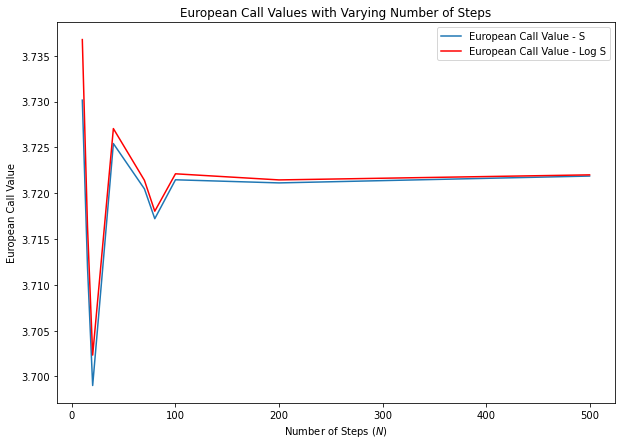

In [9]:
#questino5
def stockTrinomial(r, u, d, mid, S0, T, n):
    stockT = [np.array([S0])]
    for i in range(n):
        current_S = stockT[-1]
        stockt = np.concatenate((current_S*u, [current_S[-1]*mid, current_S[-1]*d]))
        stockT.append(stockt)
    return stockT[-1]
def EuropeanTrinomial_S(r, sd, S0, T, K, n):
    dt = T/n
    d = m.exp(-sd*m.sqrt(3*dt))# up, down and middle
    u = 1/d
    mid = 1
    pu = (r*dt*(1-d) + (r*dt)**2 + sd**2 *dt)/((u - d)*(u - 1))# find risk-neutral probability, pu, pd, pm
    pd = (r*dt*(1-u) + (r*dt)**2 + sd**2 *dt)/((u - d)*(1 - d))
    pm = 1 - pu - pd
    S_trinomial =  stockTrinomial(r, u, d, mid, S0, T, n)# Find last period stock price
    payoffs = np.maximum(S_trinomial - K, 0)# initialize payoffs
    for i in range(n):# find the call option value
        payoffs = (payoffs[:-2] * pu + payoffs[1:-1] * pm + payoffs[2:] * pd)/(m.exp(r*dt))
    return payoffs[0]
T = 1/2
sd = 0.24
r = 0.05
S0 = 32
K =  30
N = [10, 15, 20, 40, 70, 80, 100, 200, 500]
calls_trinomial_S = [EuropeanTrinomial_S(r, sd, S0, T, K, i) for i in N]
def logStockTrinomial(r, dXu, dXd, dXm, X0, T, n):
    log_stockT = [np.array([X0])]
    for i in range(n):
        current_X = log_stockT[-1]
        log_stockt = np.concatenate((current_X + dXu, [current_X[-1] + dXm, current_X[-1] + dXd]))
        log_stockT.append(log_stockt)
    return log_stockT[-1]
def EuropeanTrinomial_logS(r, sd, S0, T, K, n):
    dt = T/n
    X0 = m.log(S0)
    dXu = sd*m.sqrt(3*dt)# up, down and middle
    dXd = -sd*m.sqrt(3*dt)
    dXm = 0
    pu = (1/2)*(((r - 0.5*sd**2)**2 *(dt)**2 + sd**2 *dt)/(dXu)**2 + ((r - 0.5*sd**2)*dt)/dXu)# find risk-neutral probability, pu, pd, pm
    pd = (1/2)*(((r - 0.5*sd**2)**2 *(dt)**2 + sd**2 *dt)/(dXu)**2 - ((r - 0.5*sd**2)*dt)/dXu)
    pm = 1 - pu - pd
    logS_trinomial =  logStockTrinomial(r, dXu, dXd, dXm, X0, T, n)# Find last period stock price
    payoffs = np.maximum(np.exp(logS_trinomial) - K, 0)# initialize payoffs    
    for i in range(n):# find the call option value
        payoffs = (payoffs[:-2] * pu + payoffs[1:-1] * pm + payoffs[2:] * pd)/(m.exp(r*dt))
    return payoffs[0]
calls_trinomial_logS = [EuropeanTrinomial_logS(r, sd, S0, T, K, i) for i in N]
calls_trinomial_S = zip(N, calls_trinomial_S)
calls_trinomial_logS = zip(N, calls_trinomial_logS)
plt.figure(figsize=(10,7))
plt.plot(*zip(*calls_trinomial_S), label="European Call Value - S", color = 'C0')
plt.plot(*zip(*calls_trinomial_logS), label="European Call Value - Log S", color = 'r')
plt.title("European Call Values with Varying Number of Steps")
plt.xlabel("Number of Steps ($N$)")
plt.ylabel("European Call Value")
plt.legend()
plt.show()

In [12]:
#question6
def helton(n, base):
    seq = [0]*n
    numbit = int(1 + np.ceil(np.log(n)/np.log(base)))
    vetbase = [base**(-i) for i in range(1, numbit+1)]
    for i in range(n):
        workvet = [0] * numbit
        num = i+1
        digit = []
        while num:
            num, rem = divmod(num, base)
            digit.append(rem)
        length = len(digit)
        for j in range(length):
            workvet[j] = digit[j]
        seq[i] = np.dot(workvet, vetbase)
    return seq
def question6(S0,K,T,r,sigma,N,b1,b2): 
    h1 = helton(N, b1)
    h2 = helton(N, b2)
    #生成两个normal
    z1 = [np.sqrt(-2*np.log(h1[i]))*np.cos(2*np.pi*h2[i]) for i in range(N)]
    z2 = [np.sqrt(-2 * np.log(h1[i])) * np.sin(2 * np.pi * h2[i]) for i in range(N)]
    #normal 加 normal 还是 normal
    norm = z1+z2
    price = np.mean([np.exp(-r*T)*max(0, S0*np.exp(T*(r-0.5*sigma**2)+sigma*np.sqrt(T)*norm[i])-K) for i in range(2*N)])
    print("Q6: The call option price is %.6f" % price)
question6(S0 = 32, K = 30,T = 0.5,r = 0.05, sigma = 0.24,N = 1000,b1 = 2,b2 = 7)

Q6: The call option price is 3.725469
